# Uncertainpy example: Hodgkin-Huxley action potential with analysis of three parameters
Uncertainpy can be found at: https://github.com/simetenn/uncertainpy.
This example is derived from the examples provided with Uncertainpy and detailed in Tennoe et al (Frontiers in Neuroinformatics 2018 12:49 DOI: 10.3389/fninf.2018.00049) It is based on the model of Torres Valderamma et al (Journal of Mathematical Neuroscience 2015 5:3 DOI: 10.1186/2190-8567-5-3).

This cell runs the analysis with the standard default parameters for Uncertainpy, which results in an analysis using polynomial chaos expansions with point collocation.

In [2]:
import uncertainpy as un
import chaospy as cp
import numpy as np
import matplotlib.pyplot as plt

from valderrama import valderrama

# Define a parameter list and data file name
# Maximum conductances
parameters = {"gbar_Na": 120,
              "gbar_K": 36,
              "gbar_L": 0.3}
fdat = "HH_param3_maxcond"
# Reversal potentials
#parameters = {"E_Na": 112,
#              "E_K": -12,
#              "E_l": 10.613}
#fdat = "HH_param3_revpot"

if __name__ == '__main__':
        
    # Few parameters
    model = un.Model(run=valderrama,
                     labels=["Time (ms)", "Membrane potential (mV)"])
    
    # Create the parameters
    parameters = un.Parameters(parameters)
    
    # Set all parameters to have a uniform distribution
    # within a 20% interval around their fixed value
    parameters.set_all_distributions(un.uniform(0.2))
    
    # Setup the uncertainty quantification
    UQ = un.UncertaintyQuantification(model,
                                      parameters=parameters)
    
    # We set the seed to easier be able to reproduce the result
    data = UQ.quantify(seed=10, save=False)
    data.save(fdat+".h5")


chaospy.orth_ttr name is to be deprecated; Use chaospy.expansion.stieltjes instead


On Windows machines everything in your script must be inside of an if __name__ == '__main__': block in order for multiprocess to work.


Calculating statistics from PCE: 100%|██████████| 1/1 [00:06<00:00,  6.42s/it]


This cell analyses and plots the results, using data stored above (so not necessary to run Uncertainpy each time)

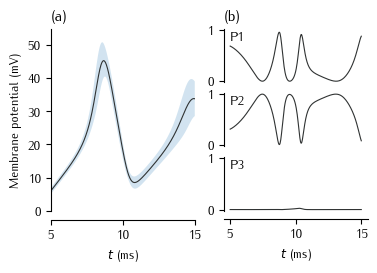

In [3]:
import uncertainpy as un
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
from matplotlib import rcParams

# Plot parameters
plt.rcdefaults()
plt.rcParams['svg.fonttype'] = 'none'
rcParams.update({'font.size': 9})
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Iwona'] + rcParams['font.sans-serif']
rcParams['lines.linewidth'] = 0.8

# Convert cm in figure size to inches
def cm2inch(value):
    return value/2.54

# parameter names for axis labels
params = ["P1", "P2", "P3"]
#params = ["$\overline{g}_\mathrm{Na}$","$\overline{g}_\mathrm{K}$", "$\overline{g}_\mathrm{L}$"]
#params = ["$E_\mathrm{Na}$","$E_\mathrm{K}$", "$E_\mathrm{L}$"]

# load previously generated data
data = un.Data(fdat+".h5")

time = data["valderrama"].time
mu = data["valderrama"].mean
var = data["valderrama"].variance
sigma = np.sqrt(data["valderrama"].variance)
p90 = mu + 2*sigma
p90m = mu - 2*sigma

# Sobol indices
sfirst = data["valderrama"].sobol_first

fig = plt.figure()
fig.set_size_inches(cm2inch(10.4),cm2inch(6))
gs = gridspec.GridSpec(3, 2)

ax = fig.add_subplot(gs[:, 0])
ax.plot(time, mu, linestyle='-',color='#303333')
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel(data["valderrama"].labels[1])
ax.set_title('(a)', loc='left')
ax.fill_between(time, p90m, p90, alpha=0.2)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim([5,15])
ax.set_ylim([0,55])

for i in range(3):
    ax = fig.add_subplot(gs[i, 1])
    ax.plot(time, sfirst[i], linestyle='-',color='#303333')
    ax.set_ylim([-0.02, 1.02])
    ax.annotate(params[i],
            xy=(5, 0.8), xycoords='data',
            xytext=(5, 0.8), textcoords='data',
            )

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    if i < 2: 
        ax.spines['bottom'].set_color('none')
        ax.xaxis.set_ticks_position('none')
        ax.tick_params(axis='x', labelcolor='none')
    if i == 2: 
        ax.spines['bottom'].set_position(('axes', -0.15))
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xlabel('$t$ (ms)')
    if i == 0: 
        ax.set_title('(b)', loc='left')
    
#plt.savefig("figures/"+fdat+".svg", format="svg")
#plt.savefig("figures/"+fdat+".png", format="png")
#plt.savefig("figures/"+fdat+".eps", format="eps")
plt.show()
